### Get ALL Cards

In [1]:
# get all cards
import json5
with open('cah-base-en.deck.json5', encoding='utf-8') as fh:
    d = json5.load(fh)
bc = d['calls']
flatten = lambda t:[item for sublist in t for item in sublist]
bc = ["".join([x if type(x) == str else '_' for x in flatten(d['calls'][i])]) for i in range(len(d['calls']))]
bc = [i.replace("__", "_") for i in bc]
# grab white cards
wc = d['responses']
print(bc[:10])
nbc = [i for i in bc if i.count('_') <= 3]

['Hey Reddit! I’m _.Ask me anything.', 'Introducing X-treme Baseball!It’s like baseball, but with _!', 'What is Batman’s guilty pleasure?_.', 'TSA guidelines now prohibit _ on airplanes.', 'Next from J.K. Rowling: _.', 'That’s right, I killed _.How, you ask?_.', 'I’m sorry professor, but I couldn’t complete my homework because of _.', 'And the Academy Award for _ goes to _.', 'Dude, do not go in that bathroom.There’s _ in there.', 'How did I lose my virginity?_.']


### Generating Card Combinations

In [2]:
# create all possible card combinations
# just brute force it!


import itertools
import random
from tqdm import tqdm
def make_card_combs_1slot(wcs, bcs):
    onec = wcs
    bcl = []
    wcl = []
    plays = []
    for bc in tqdm(bcs):
            t = bc
            ss = bc.split("_")
            b = [i.strip() for i in ss]
            for p in onec:
                bcl.append(t)
                wcl.append(p)
                s = b[0] + " " + p + " " +  b[1]
                s.replace(". ", " .")
                plays.append(s)
    return [i for i in plays if i != None], bcl, wcl

def sample_2slot(wcs,bcs,n_sample = 500):
    twoc = [i for i in itertools.permutations(wcs, 2)]
    plays = []
    bcl = []
    wcl = []
    for bc in tqdm(bcs):
        t = bc
        ss = bc.split("_")
        b = [i.strip() for i in ss]
        random.shuffle(twoc)
        sample_twoc = twoc[:n_sample]
        for p in sample_twoc:
            bcl.append(t)
            wcl.append(p)
            s = b[0] + " " + p[0] + " " +  b[1] + " " + p[1] + b[2]
            s.replace(". ", " .")
            plays.append(s)
    return [i for i in plays if i != None], bcl, wcl

def sample_3slot(wcs,bcs,n_sample = 500):
    #runs slowly and takes ~ 10gb memory. couldve optimize it better but im too lazy
    threec = [i for i in itertools.permutations(wcs, 3)]
    plays = []
    bcl = []
    wcl = []
    for bc in bcs:
        t = bc
        ss = bc.split("_")
        b = [i.strip() for i in ss]
        random.shuffle(threec)
        sample_threec = threec[:n_sample]
        for p in tqdm(sample_threec):
            bcl.append(t)
            wcl.append(p)
            s = b[0] + " " + p[0] + " " +  b[1] + " " + p[1] + b[2] + " " + p[2] + " " + b[3]
            s.replace(". ", " .")
            plays.append(s)
    return [i for i in plays if i != None], bcl, wcl

In [3]:
bc1 = [i for i in bc if i.count('_') == 1]
bc2 = [i for i in bc if i.count('_') == 2]
bc3 = [i for i in bc if i.count('_') == 3]

bcl = []
wcl = []

all_1slot_combs, a, b = make_card_combs_1slot(wc, bc1)
print(len(all_1slot_combs))
bcl += a
wcl+=b

sample_2slot_combs, a, b = sample_2slot(wc, bc2, n_sample = 2750)
print(len(sample_2slot_combs))
bcl += a
wcl+=b

'''
sample_3slot_combs, a, b = sample_3slot(wc, bc3, n_sample = 0)
print(len(sample_3slot_combs))
bcl += a
wcl+=b''' 

  8%|▊         | 1/12 [00:00<00:01,  9.02it/s]

33000


100%|██████████| 12/12 [00:01<00:00,  8.70it/s]

33000


'\nsample_3slot_combs, a, b = sample_3slot(wc, bc3, n_sample = 0)\nprint(len(sample_3slot_combs))\nbcl += a\nwcl+=b'

In [4]:
all_card_combs = all_1slot_combs + sample_2slot_combs #+ sample_3slot_combs
print(len(all_card_combs))

66000


### Generate Card Embeddings

In [5]:
#import necessary libraries
import pandas as pd
import random
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer('distilbert-base-nli-mean-tokens')
avg_model = SentenceTransformer('average_word_embeddings_glove.6B.300d')

In [6]:
import numpy as np
#generate embeddings and store in dataframe
df = pd.DataFrame(columns=('black_card', 'white_card(s)','sentence', 'Bert_embed_raw', 'Avg_embed'))
for i in tqdm(range(0, len(all_card_combs))):
    c = all_card_combs[i]
    black_card = bcl[i] 
    white_card = wcl[i]
    bert = bert_model.encode(c)
    avg = avg_model.encode(c)
    
    df['black_card'] = df['black_card'].astype('object')
    df.at[i, 'black_card'] = black_card
    df['white_card(s)'] = df['white_card(s)'].astype('object')
    df.at[i, 'white_card(s)'] = white_card
    df['sentence'] = df['sentence'].astype('object')
    df.at[i, 'sentence'] = c
    df['Bert_embed_raw'] = df['Bert_embed_raw'].astype('object')
    df.at[i, 'Bert_embed_raw'] = bert
    df['Avg_embed'] = df['Avg_embed'].astype('object')
    df.at[i, 'Avg_embed'] = avg
print(df)

100%|██████████| 66000/66000 [22:28<00:00, 48.95it/s]

                                        black_card  \
0               Hey Reddit! I’m _.Ask me anything.   
1               Hey Reddit! I’m _.Ask me anything.   
2               Hey Reddit! I’m _.Ask me anything.   
3               Hey Reddit! I’m _.Ask me anything.   
4               Hey Reddit! I’m _.Ask me anything.   
...                                            ...   
65995  What’s the next superhero/sidekick duo?_/_.   
65996  What’s the next superhero/sidekick duo?_/_.   
65997  What’s the next superhero/sidekick duo?_/_.   
65998  What’s the next superhero/sidekick duo?_/_.   
65999  What’s the next superhero/sidekick duo?_/_.   

                                           white_card(s)  \
0                                                silence   
1      the illusion of choice in a late-stage capital...   
2                                              many bats   
3                                                 famine   
4                                  flesh-eating bac

In [9]:
#save the df
df.to_pickle("training_set_data_raw")

### Getting the PCA of Bert

In [7]:
#get bert embeddings as np array
bert_embed = df['Bert_embed_raw'].to_list()
print(type(bert_embed))
bert_embed = [bert_embed[i].tolist()  for i in range(len(bert_embed))]
#print(type(ordered_embeddings), len(ordered_embeddings))
#print(type(ordered_embeddings[0]), len(ordered_embeddings[0]))
bert_embed = np.array(bert_embed)
print(type(bert_embed), bert_embed.shape)

<class 'list'>
<class 'numpy.ndarray'> (66000, 768)


In [8]:
#the pca functions
# the pca functions
import matplotlib.pyplot as plt

def show_varience(var, csvar, k):
    plt.step(range(1, len(var)+1), var)
    plt.step(range(1, len(csvar)+1), csvar)    
    plt.axvline(k)

def pcaifier(arr, k = 69, verbose = True):
    """ arr: [m x n] numpy array
        percent: percent of varience to capture
     """
    cache = {}
    cache["mean"] = np.mean(arr, axis = 0)
    cache["std"] = np.std(arr)

    arr = (arr - np.mean(arr, axis = 0))/np.std(arr) # normalize
    arr_cov = np.cov(arr.T)
    eval, evec = np.linalg.eig(arr_cov)
    idx = eval.argsort()[::-1] # Sort descending and get sorted indices
    evec = evec[:,idx]
    eval = eval[idx]

    cache["eigenvalues"] = eval
    cache["eigenvectors"] = evec

    tot = sum(eval)
    var_exp = [(i/tot) for i in eval]
    cum_var_exp = np.cumsum(var_exp)
    

    if verbose:
        show_varience(var_exp, cum_var_exp, k)
        print("% kept at dimension", k, ":", cum_var_exp[k-1])
    return evec, cache

def visualize_2D(X, V, cache):
    X = (X - cache["mean"])/cache["std"]
    X_reduced = X@V[:, :2]
    print("X_reduced:",X_reduced.shape)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], s = 0.0007)

from mpl_toolkits.mplot3d import Axes3D

def visualize_3D(X, V, cache, elev = 20, azim = 0):
    fig = plt.figure()
    ax = Axes3D(fig)

    X_reduced = X@V[:, :3]
    print("X_reduced:",X_reduced.shape)


    ax.view_init(elev=elev, azim=azim)
    ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2], s = 0.0007)

% kept at dimension 3 : 0.2160132576621666


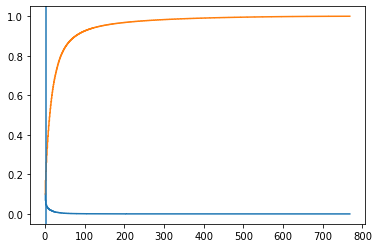

In [10]:
#run pca
V, cache = pcaifier(bert_embed, 3)

V: <class 'numpy.ndarray'> (768, 768)
Ordered_embeddings: <class 'numpy.ndarray'> (66000, 768)
X_reduced: (66000, 2)
X_reduced: (66000, 3)
X_reduced: (66000, 3)
X_reduced: (66000, 3)
X_reduced: (66000, 3)
X_reduced: (66000, 3)
X_reduced: (66000, 3)


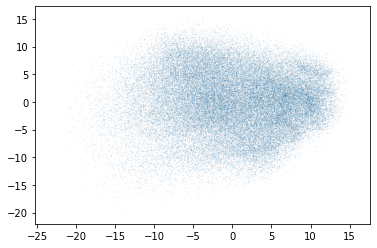

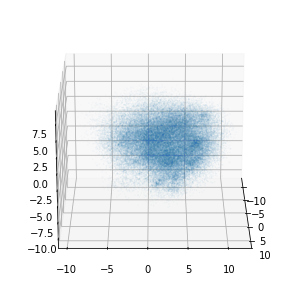

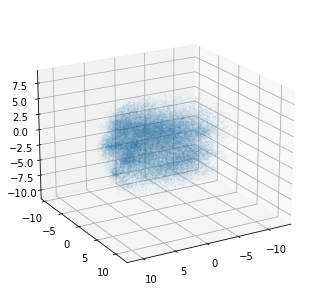

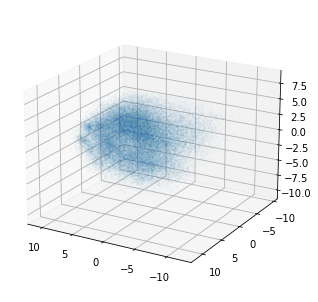

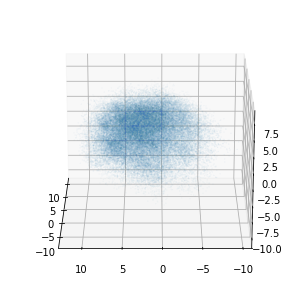

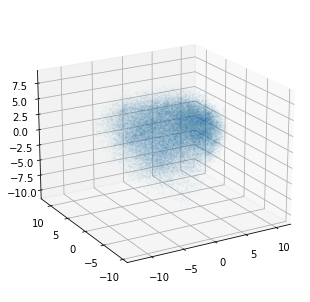

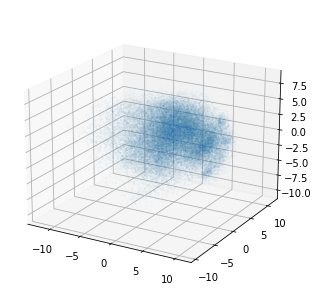

In [11]:
# visualize data 2 and 3 d
print("V:", type(V),V.shape)
print("Ordered_embeddings:",type(bert_embed), bert_embed.shape)
visualize_2D(bert_embed, V, cache)
for i in range(0,360,60):
      visualize_3D(bert_embed, V, cache,azim = i)

In [12]:
#add the reduced dimension column
bert_69 = (bert_embed - cache["mean"])/cache["std"]
bert_69 = bert_69@V[:, :69]
print(bert_69.shape)
print(bert_69)

(66000, 69)
[[ -9.77506719  -6.44316598   2.79501247 ...   2.20137875   0.47504487
    0.27278682]
 [ -0.3780764   -1.50828903   4.60957389 ...   1.46598803  -2.06575296
    0.68364301]
 [ -3.54754954  -6.28174816   6.65255455 ...   1.80341594  -0.67719229
    0.71374771]
 ...
 [  7.95439891  -2.53429571 -11.469621   ...   0.58951749   0.73547225
    0.53799504]
 [  0.59786038  -1.91990293   2.00009782 ...  -0.32640542  -0.06463678
    0.50081357]
 [  0.10163832 -14.61211542  -0.75795206 ...   0.081922    -0.03721482
   -0.63136227]]


In [13]:
df["Bert_embed_69"] = np.nan
for i in tqdm(range(0, len(all_card_combs))):
    df['Bert_embed_69'] = df['Bert_embed_69'].astype('object')
    df.at[i, 'Bert_embed_69'] = bert_69[i,:]
print(df)

100%|██████████| 66000/66000 [00:46<00:00, 1407.19it/s]

                                        black_card  \
0               Hey Reddit! I’m _.Ask me anything.   
1               Hey Reddit! I’m _.Ask me anything.   
2               Hey Reddit! I’m _.Ask me anything.   
3               Hey Reddit! I’m _.Ask me anything.   
4               Hey Reddit! I’m _.Ask me anything.   
...                                            ...   
65995  What’s the next superhero/sidekick duo?_/_.   
65996  What’s the next superhero/sidekick duo?_/_.   
65997  What’s the next superhero/sidekick duo?_/_.   
65998  What’s the next superhero/sidekick duo?_/_.   
65999  What’s the next superhero/sidekick duo?_/_.   

                                           white_card(s)  \
0                                                silence   
1      the illusion of choice in a late-stage capital...   
2                                              many bats   
3                                                 famine   
4                                  flesh-eating bac

In [17]:
import pickle
#save the final training set and cache
#df.to_pickle("training_set_data_69")
with open('pca_cache_69_5050.pkl', 'wb') as f:
    pickle.dump(cache, f)

### Visualization (optional)

In [14]:
def plot_3D_PCA_by_bc(df,bc,Color_configuration = "show_all"):

    #get X_reduced from the dataframe
    embed_69 = df['Bert_embed_69'].to_list()
    embed_69 = [embed_69[i].tolist()  for i in range(len(embed_69))]
    embed_69 = np.array(embed_69)
    
    print(embed_69.shape)

    #color configuration (have to use random??)
    colors = {}
    for key in bc:
        if Color_configuration == "show_all":
            colors[key] = (round(random.random(),1),round(random.random(),1),round(random.random(),1))
        else:
            colors[key] = 'black' if key == Color_configuration else 'moccasin'


    for i in range(0,360,60):
        fig = plt.figure()
        ax = Axes3D(fig)

        ax.view_init(elev=20, azim=i)
        ax.scatter(embed_69[:,0], embed_69[:,1],embed_69[:,2], c=df['black_card'].map(colors), s = 0.01)

def plot_3D_PCA_by_wc(df,wc,Color_configuration = "show_all"):
        
    df = df.drop(index = [i for i in range(33000,40000)])
    
    #get X_reduced from the dataframe
    embed_69 = df['Bert_embed_69'].to_list()
    embed_69 = [embed_69[i].tolist()  for i in range(len(embed_69))]
    embed_69 = np.array(embed_69)
    
    print(embed_69.shape)

    #color configuration (have to use random??)
    colors = {}
    for key in wc:
        if Color_configuration == "show_all":
            colors[key] = (round(random.random(),1),round(random.random(),1),round(random.random(),1))
        else:
            colors[key] = 'black' if key == Color_configuration else 'moccasin'


    for i in range(0,360,60):
        fig = plt.figure()
        ax = Axes3D(fig)

        ax.view_init(elev=20, azim=i)
        ax.scatter(embed_69[:,0], embed_69[:,1],embed_69[:,2], c=df['white_card(s)'].map(colors), s = 0.01)

(66000, 69)


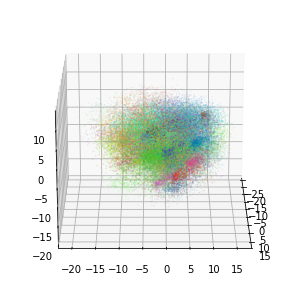

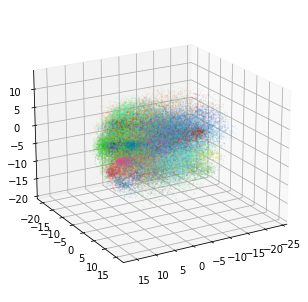

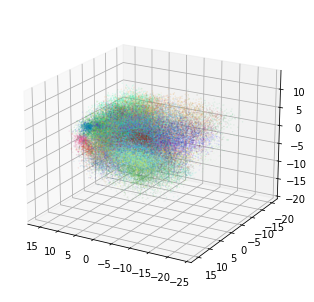

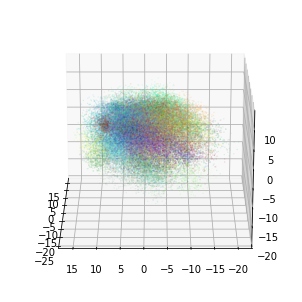

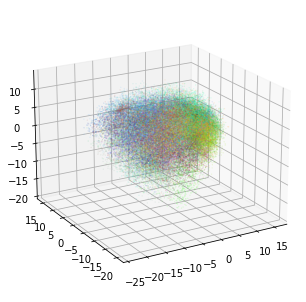

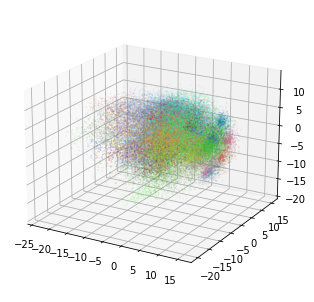

In [15]:
plot_3D_PCA_by_bc(df, bc, Color_configuration = "show_all")

In [22]:
#plot_3D_PCA_by_wc(df, wc, Color_configuration = "show_all")


In [26]:
# load some reddit oneliners to the dataset

df = pd.read_csv ('r-Oneliners-scraped.csv')
print (df)

                                                 Title  \
0           This yar I rsolv to rplac th on my kyboard   
1                  Constipated people dont give a shit   
2    The doctor told us that my father hadn't made ...   
3    when two vegetarians are arguing, is it still ...   
4    The discovery of static electricity was a shoc...   
..                                                 ...   
539  Waking up this morning was an eye-opening expe...   
540  I had a bad audition, but I acted like I didn'...   
541  Taylor Swift tells me I need to stop name-drop...   
542  Knowing how to pick locks has really opened a ...   
543  Dating a hair dresser has a lot of fringe bene...   

                                                  Text  Score  
0                                                  NaN     55  
1                                                  NaN     58  
2                                                  NaN     18  
3                                              

In [33]:
#save the 69 embed only
#generate embeddings and store in dataframe
df = pd.DataFrame(columns=('black_card', 'white_card(s)','sentence', 'Bert_embed_raw'))
for i in tqdm(range(0, len(all_card_combs))):
    c = all_card_combs[i]
    black_card = bcl[i] 
    white_card = wcl[i]
    bert = bert_model.encode(c)
    
    df['black_card'] = df['black_card'].astype('object')
    df.at[i, 'black_card'] = black_card
    df['white_card(s)'] = df['white_card(s)'].astype('object')
    df.at[i, 'white_card(s)'] = white_card
    df['sentence'] = df['sentence'].astype('object')
    df.at[i, 'sentence'] = c
    df['Bert_embed_raw'] = df['Bert_embed_raw'].astype('object')
    df.at[i, 'Bert_embed_raw'] = bert
print(df)

100%|██████████| 66000/66000 [30:33<00:00, 35.99it/s]

                                        black_card  \
0               Hey Reddit! I’m _.Ask me anything.   
1               Hey Reddit! I’m _.Ask me anything.   
2               Hey Reddit! I’m _.Ask me anything.   
3               Hey Reddit! I’m _.Ask me anything.   
4               Hey Reddit! I’m _.Ask me anything.   
...                                            ...   
65995  What’s the next superhero/sidekick duo?_/_.   
65996  What’s the next superhero/sidekick duo?_/_.   
65997  What’s the next superhero/sidekick duo?_/_.   
65998  What’s the next superhero/sidekick duo?_/_.   
65999  What’s the next superhero/sidekick duo?_/_.   

                                           white_card(s)  \
0                                                silence   
1      the illusion of choice in a late-stage capital...   
2                                              many bats   
3                                                 famine   
4                                  flesh-eating bac

% kept at dimension 69 : 0.8864641094850819


  0%|          | 91/66000 [00:00<01:12, 903.40it/s]

(66000, 69)
[[-9.75473956  6.4920336   2.49451689 ... -2.01186331 -0.25827086
  -0.4159093 ]
 [-0.366728    1.49617213  4.48232629 ... -0.75486134  2.27561883
  -0.26525045]
 [-3.55084438  6.29553699  6.65335197 ... -1.37108822  0.92661898
  -0.54980111]
 ...
 [ 3.37969803  6.30856325  1.29548511 ... -0.80544322  0.52456468
   0.28458771]
 [ 4.95482271  4.15275659  2.479492   ...  0.24581474 -0.79602475
  -1.03000842]
 [ 3.33345336 11.93449728 -0.96044074 ... -0.61047118 -0.84555386
   0.01747097]]


100%|██████████| 66000/66000 [01:02<00:00, 1058.64it/s]


                                        black_card  \
0               Hey Reddit! I’m _.Ask me anything.   
1               Hey Reddit! I’m _.Ask me anything.   
2               Hey Reddit! I’m _.Ask me anything.   
3               Hey Reddit! I’m _.Ask me anything.   
4               Hey Reddit! I’m _.Ask me anything.   
...                                            ...   
65995  What’s the next superhero/sidekick duo?_/_.   
65996  What’s the next superhero/sidekick duo?_/_.   
65997  What’s the next superhero/sidekick duo?_/_.   
65998  What’s the next superhero/sidekick duo?_/_.   
65999  What’s the next superhero/sidekick duo?_/_.   

                                           white_card(s)  \
0                                                silence   
1      the illusion of choice in a late-stage capital...   
2                                              many bats   
3                                                 famine   
4                                  flesh-eating bac

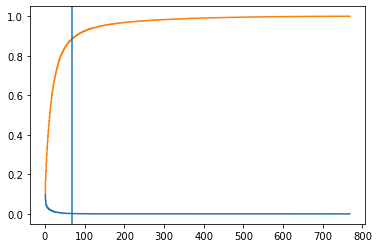

In [34]:
V, cache = pcaifier(bert_embed, 69)
#add the reduced dimension column
bert_69 = (bert_embed - cache["mean"])/cache["std"]
bert_69 = bert_69@V[:, :69]
print(bert_69.shape)
print(bert_69)
df["Bert_embed_69"] = np.nan
for i in tqdm(range(0, len(all_card_combs))):
    df['Bert_embed_69'] = df['Bert_embed_69'].astype('object')
    df.at[i, 'Bert_embed_69'] = bert_69[i,:]
print(df)

In [39]:
#df.drop(columns=['Bert_embed_raw'], inplace = True)
print(df)
df.to_pickle("training_set_data_69_5050.pkl")

                                        black_card  \
0               Hey Reddit! I’m _.Ask me anything.   
1               Hey Reddit! I’m _.Ask me anything.   
2               Hey Reddit! I’m _.Ask me anything.   
3               Hey Reddit! I’m _.Ask me anything.   
4               Hey Reddit! I’m _.Ask me anything.   
...                                            ...   
65995  What’s the next superhero/sidekick duo?_/_.   
65996  What’s the next superhero/sidekick duo?_/_.   
65997  What’s the next superhero/sidekick duo?_/_.   
65998  What’s the next superhero/sidekick duo?_/_.   
65999  What’s the next superhero/sidekick duo?_/_.   

                                           white_card(s)  \
0                                                silence   
1      the illusion of choice in a late-stage capital...   
2                                              many bats   
3                                                 famine   
4                                  flesh-eating bac

In [41]:
aa = pd.read_pickle("training_set_data_69_5050.pkl")
print(aa)

                                        black_card  \
0               Hey Reddit! I’m _.Ask me anything.   
1               Hey Reddit! I’m _.Ask me anything.   
2               Hey Reddit! I’m _.Ask me anything.   
3               Hey Reddit! I’m _.Ask me anything.   
4               Hey Reddit! I’m _.Ask me anything.   
...                                            ...   
65995  What’s the next superhero/sidekick duo?_/_.   
65996  What’s the next superhero/sidekick duo?_/_.   
65997  What’s the next superhero/sidekick duo?_/_.   
65998  What’s the next superhero/sidekick duo?_/_.   
65999  What’s the next superhero/sidekick duo?_/_.   

                                           white_card(s)  \
0                                                silence   
1      the illusion of choice in a late-stage capital...   
2                                              many bats   
3                                                 famine   
4                                  flesh-eating bac